## Step 0, Cleaning COVID19 data by Hossein Toreyhi

In [1]:
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
import pylab as pl
import missingno as msno

### Let's clean the COVID data step by step

1) Read CSV file

In [2]:
Data = pd.read_csv ("COVID.csv")
Data.shape

C:\Users\Asus\AppData\Local\Temp\ipykernel_12668\2206606088.py:1: DtypeWarning: Columns (3,10,11,16,17,18,22,23,30,31,42,43,46,48,51,52,54,55,59,61,79,81,82,83,84,86,92,93,96,98,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,183,187,205,206,208,209,211,213,222,229,242,245,246,249,252,255,256,258,259,268,283,297,299,301,305,307,308,309,310,311,312,313,314,325,326) have mixed types. Specify dtype option on import or set low_memory=False.
  Data = pd.read_csv ("COVID.csv")


(9134, 327)

2. Check the nullity

In [3]:
Data_null = Data.isnull ()
print (Data_null.sum ())

Patient_Number                    0
Patient_Phase                     0
Patient_Hospital                  0
Patient_C19Variant             7315
Outcome_InhospitalMortality       0
                               ... 
LAB_Zinc_y_First               9133
LAB_IgM_First                  9106
LAB_IgG_First                  9073
LAB_SARSCOV2Egene_First        8580
LAB_SARSCOV2Egene_First.1      8580
Length: 327, dtype: int64


[ 1.  0. nan]
[1 0]
[1 0]
[1 0]
Outcome_InhospitalMortality
0.0    0.799448
1.0    0.200552
Name: proportion, dtype: float64
Outcome_ICUadmission
0    0.83764
1    0.16236
Name: proportion, dtype: float64
TM_S_Dialysis
0    0.966389
1    0.033611
Name: proportion, dtype: float64
TM_S_Intubation
0    0.903766
1    0.096234
Name: proportion, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Outcome_InhospitalMortality  9055 non-null   float64
 1   Outcome_ICUadmission         9134 non-null   int64  
 2   TM_S_Dialysis                9134 non-null   int64  
 3   TM_S_Intubation              9134 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 285.6 KB


<Axes: >

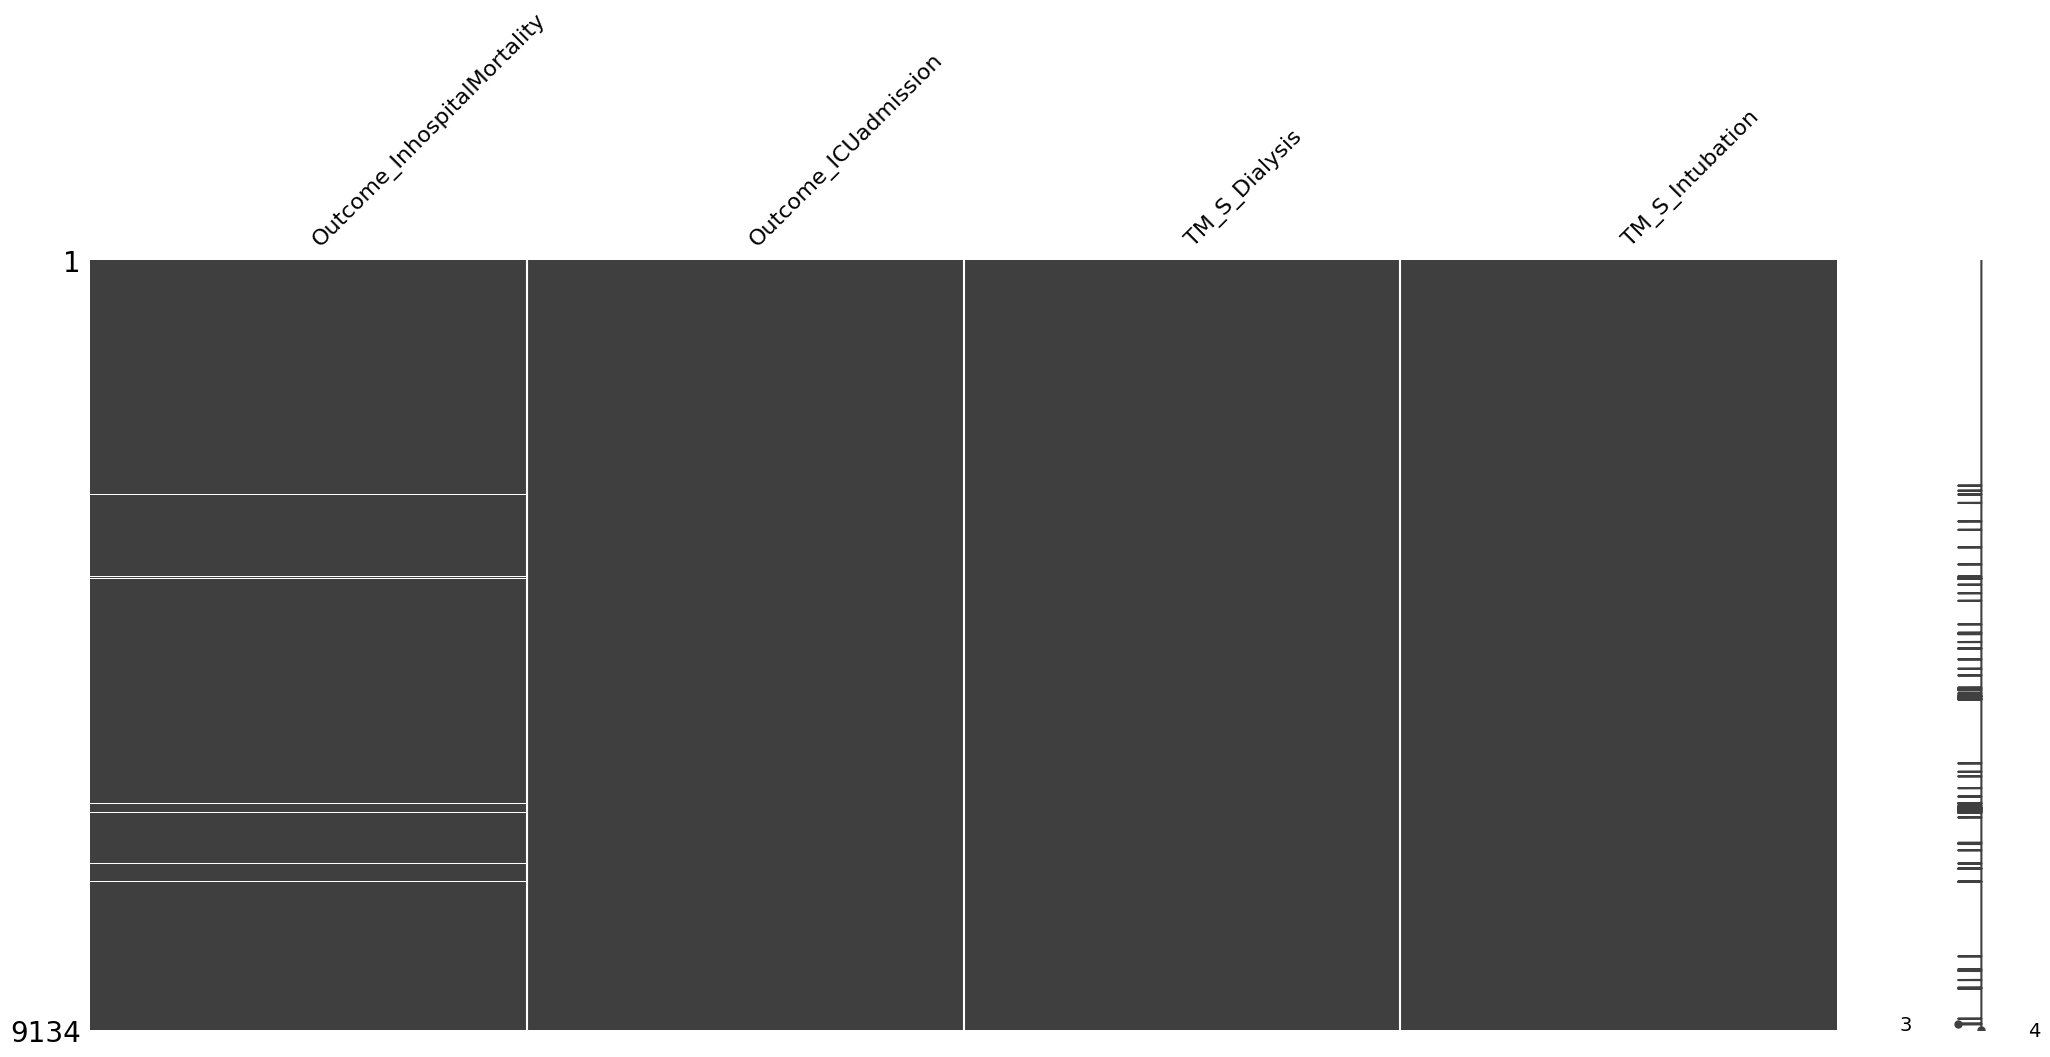

In [4]:
# Gender 
sex_map = {"1":"Male" , "2":"Female" , "0" : np.nan}
Data ["Demographic_Gender"] = Data ["Demographic_Gender"].replace(sex_map)
Data ["Demographic_Gender"] = pd.factorize( Data ["Demographic_Gender"])[0]

# mortality
outcome_map = {"Survived": 0, "Died" : 1 , "Unknown" : np.nan }
Data ["Outcome_InhospitalMortality"] = Data ["Outcome_InhospitalMortality"].replace(outcome_map)


outputs = ['Outcome_InhospitalMortality','Outcome_ICUadmission','TM_S_Dialysis','TM_S_Intubation']

Data_mortality = Data.Outcome_InhospitalMortality.unique ()
print (Data_mortality)

Data_ICU = Data.Outcome_ICUadmission.unique ()
print (Data_ICU)

Data_Dialysis = Data.TM_S_Dialysis.unique ()
print (Data_Dialysis)

Data_intubation = Data.TM_S_Intubation.unique ()
print (Data_intubation)


for i in outputs:
    print (Data[i].value_counts(normalize = True))
    
Data[outputs].info ()
msno.matrix(Data[outputs])

3. Missing value in the output variables are very rare and their pattern are MCAR, so we can use listwise deletion for them. Compare two missing matrices.

<Axes: >

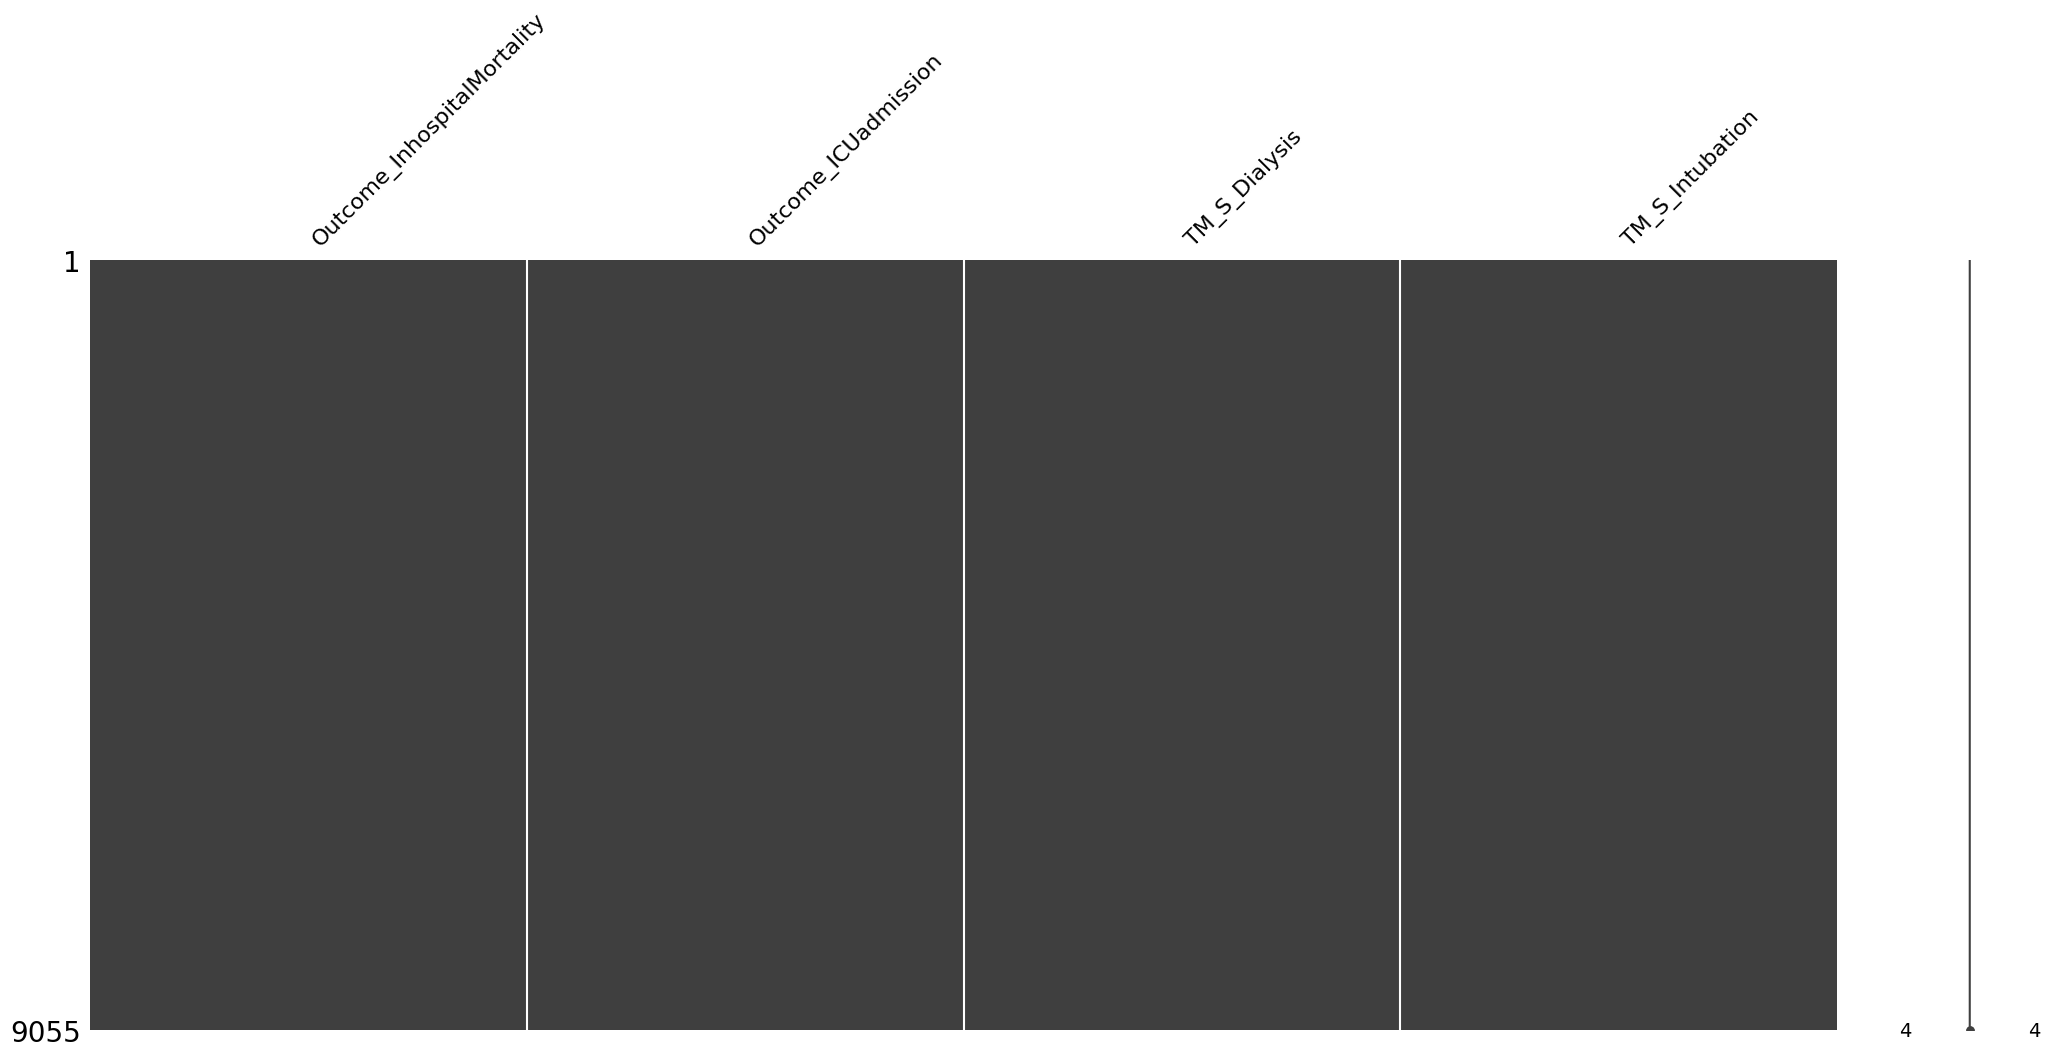

In [5]:
Data.dropna(subset=outputs, inplace=True)
msno.matrix(Data[outputs])

**So we removed all missing value in case of output fearures. As you see in the nullity matrix, there are no missing value in case of 4 outcome variables**


4. Let's go for remaining data 

<Axes: >

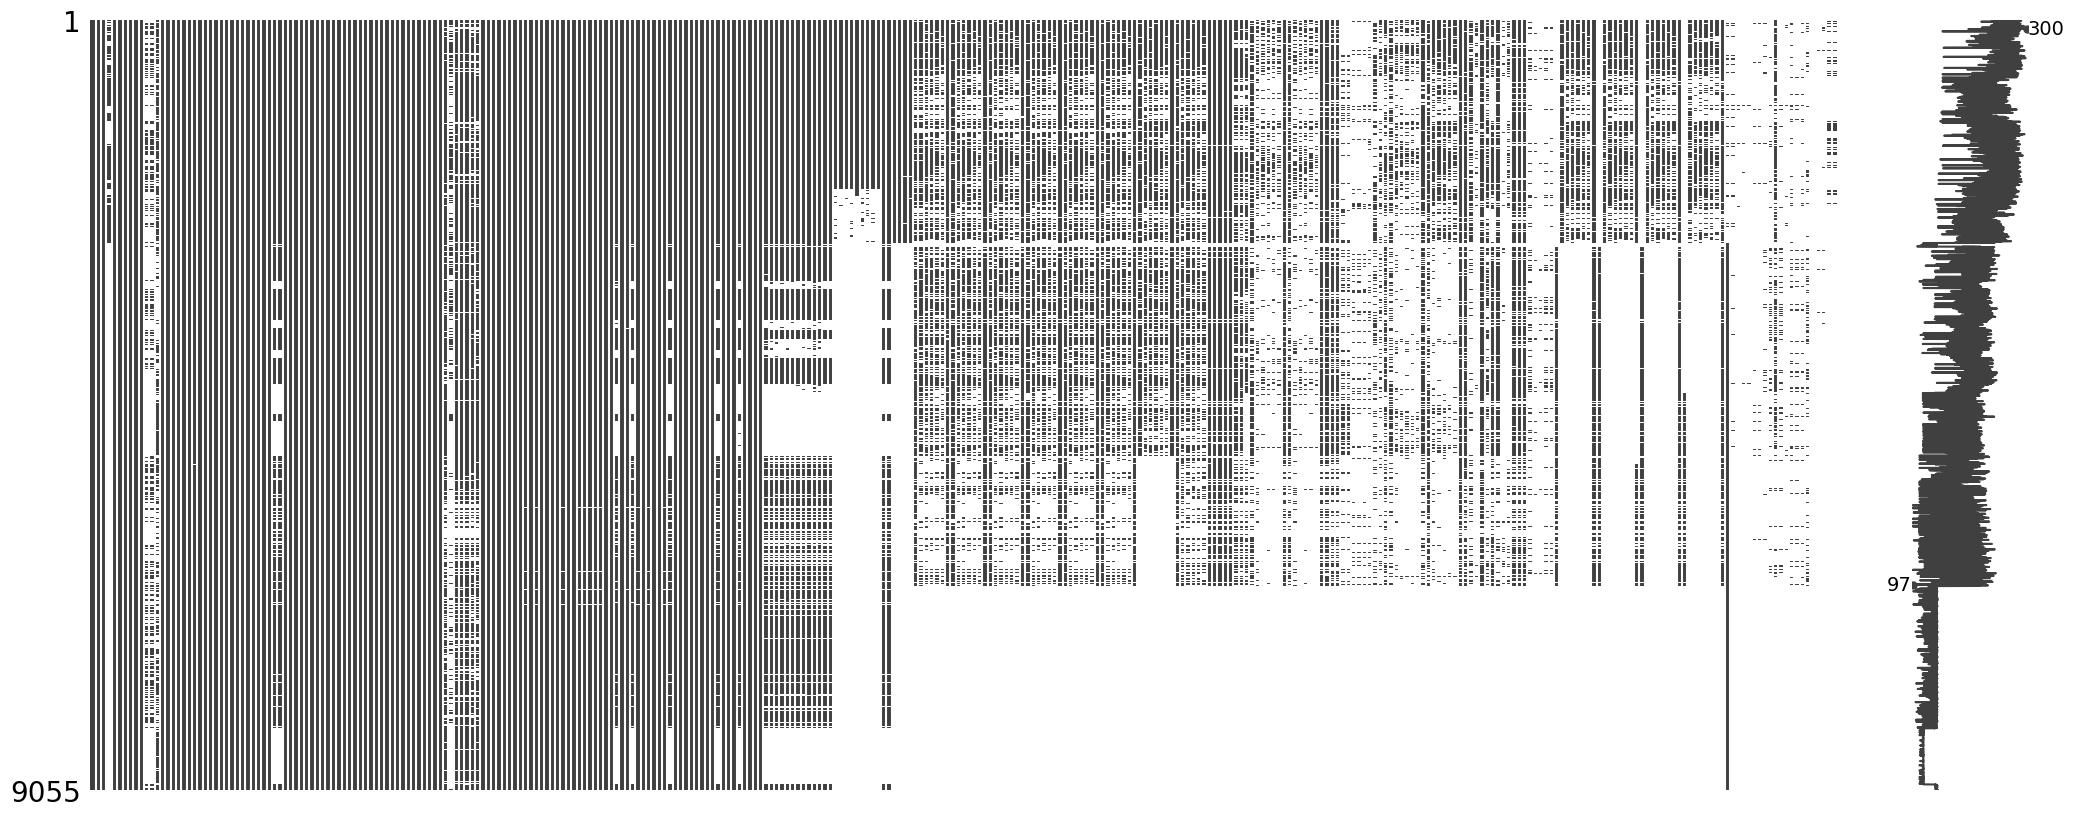

In [6]:
msno.matrix(Data)

Database needs to be encoded and cleaned

In [7]:
# first we need to encode categorical variables into nummeric values

from sklearn.preprocessing import OrdinalEncoder

Total_categorical_list = ['Patient_Phase','Patient_Hospital','Patient_C19Variant','Symptom_Other symptoms',
                          'MH_Otherdiseases','TM_OtherTreatment1','TM_OtherTreatment2','LAB_BloodGroupABO_First',
                          'LAB_BloodGroupRh_First','LAB_SARSCOV2Egene_First', 'LAB_SARSCOV2Egene_First']
ordinal_enc_dict = {}
for col_name in Total_categorical_list:
    ordinal_enc_dict [col_name] = OrdinalEncoder()
    col = Data[col_name]
    col_not_null = col [col.notnull()]
    reshaped_vals = col_not_null.values.reshape (-1,1)
    encoded_vals = ordinal_enc_dict [col_name].fit_transform (reshaped_vals)
    Data.loc [col.notnull(), col_name] = np.squeeze (encoded_vals)

In [8]:
for column_name in Data.columns:
    
    # Get unique values for the current column
    unique_values = Data[column_name].unique()
    
    # Print the column name and its unique values
    print(f"Unique values in {column_name}:")
    print(unique_values)
    print("\n")
    print (Data[column_name].value_counts())
    print("\n")

Unique values in Patient_Number:
[   1    2    3 ... 9132 9133 9134]


Patient_Number
1       1
6080    1
6074    1
6075    1
6076    1
       ..
3017    1
3016    1
3015    1
3014    1
9134    1
Name: count, Length: 9055, dtype: int64


Unique values in Patient_Phase:
[1.0 0.0]


Patient_Phase
0.0    6433
1.0    2622
Name: count, dtype: int64


Unique values in Patient_Hospital:
[0.0 3.0 1.0 2.0]


Patient_Hospital
0.0    4740
2.0    1734
1.0    1409
3.0    1172
Name: count, dtype: int64


Unique values in Patient_C19Variant:
[0.0 nan 1.0]


Patient_C19Variant
0.0    1551
1.0     268
Name: count, dtype: int64


Unique values in Outcome_InhospitalMortality:
[1. 0.]


Outcome_InhospitalMortality
0.0    7239
1.0    1816
Name: count, dtype: int64


Unique values in Outcome_LOS:
[ 30.  19.  12.  18.   6.   9.   7.  35.  16.   5.  11.   8.   2.  21.
  10.  15.  70.  39.  36.  42.  33.  31.  41.  28.  23.  24.  17.  20.
  14.  13.  25.  34.   4.   3.   1.   0.  48.  44.  53.  40.  64.  37.
 

Unique values in VS_Systolic BP:
[100. 120. 110. 135. 130. 190. 140. 155. 115.  95. 105. 160.  nan 111.
 170. 128. 109. 148. 158. 139. 122. 123.  90. 154.  85. 104.  70. 168.
 142. 138. 178. 144. 146. 150. 125. 112. 121. 124. 143. 116. 132.  92.
 180. 113. 145.  80. 166. 151.  98. 133. 157.  99. 164.  96.  91. 182.
 134. 129. 131. 165. 149. 126. 127. 119.  97. 137. 147. 114. 107. 106.
 101. 163. 108. 118. 141. 173. 153.  62. 199. 179. 194. 103. 161. 136.
 175. 152. 156. 185. 162. 192.  67. 201. 102. 195. 250.  58.  75.  79.
  56. 176.  93. 177.  60. 117. 184.  94. 200. 212.  74.  88.  82.  12.
  14. 167.  84. 189.  89. 220.  86. 159.  72. 225.  65. 210. 240.  50.
  77. 197. 230. 188.  45.  73. 181. 270.  78. 238.  16. 205. 183.  87.]


VS_Systolic BP
110.0    1835
120.0    1835
130.0    1039
100.0     667
140.0     391
         ... 
62.0        1
12.0        1
14.0        1
167.0       1
87.0        1
Name: count, Length: 139, dtype: int64


Unique values in VS_RR:
[ 32.   24.   19.   

Unique values in VaccinatedC19infect_intervalday:
[ 0.  8.  5. nan 90. 60.  4.  3. 14. 25.  7.  1. 30.  9. 11.  6. 10. 20.]


VaccinatedC19infect_intervalday
0.0     2550
7.0        7
3.0        6
14.0       4
1.0        3
5.0        2
10.0       2
60.0       2
4.0        2
8.0        2
30.0       2
9.0        2
6.0        1
25.0       1
11.0       1
90.0       1
20.0       1
Name: count, dtype: int64


Unique values in LAB_WBC_1:
[5.80000000e+00 6.90000000e+00            nan 6.60000000e+00
 8.90000000e+00 8.10000000e+00 3.40000000e+00 6.50000000e+00
 1.86000000e+01 5.90000000e+00 2.27000000e+01 4.30000000e+00
 7.30000000e+00 6.00000000e+00 1.71000000e+01 3.20000000e+00
 1.43000000e+01 1.31000000e+01 3.00000000e+00 9.00000000e+00
 8.40000000e+00 7.60000000e+00 5.40000000e+00 4.50000000e+00
 4.90000000e+00 4.80000000e+00 1.70000000e+00 1.03000000e+01
 6.10000000e+00 6.20000000e+00 9.70000000e+00 1.82000000e+01
 6.30000000e+00 7.80000000e+00 2.40000000e+00 5.30000000e+00
 7.90000000e+00 

Unique values in LAB_MCV_3:
[88.53       86.87       86.38       ... 84.51000214 84.29000092
 87.66999817]


LAB_MCV_3
87.500000    17
85.500000    16
82.100000    16
84.000000    16
83.500000    16
             ..
81.980000     1
99.260000     1
86.510000     1
81.750000     1
87.669998     1
Name: count, Length: 1960, dtype: int64


Unique values in LAB_MCV_4:
[88.33       87.1        86.         ... 85.61000061 82.86000061
 81.30999756]


LAB_MCV_4
85.500000    17
88.000000    16
85.900000    15
84.800000    14
82.500000    13
             ..
82.580000     1
92.280000     1
68.620000     1
76.160000     1
81.309998     1
Name: count, Length: 1821, dtype: int64


Unique values in LAB_MCV_5:
[87.01       88.84       86.14       ... 81.52999878 78.52999878
 87.45999908]


LAB_MCV_5
80.000000    15
86.600000    15
86.300000    14
84.200000    13
85.600000    13
             ..
66.240000     1
95.160000     1
95.750000     1
88.920000     1
87.459999     1
Name: count, Length: 1680, dtyp

LAB_ALT_4
25.000000     32
16.000000     31
18.000000     30
15.000000     28
28.000000     28
              ..
164.000000     1
828.000000     1
106.000000     1
142.000000     1
58.400002      1
Name: count, Length: 207, dtype: int64


Unique values in LAB_ALT_5:
[  58.           56.                   nan   13.           37.
   31.           83.           32.           10.          102.
   26.           63.           21.          551.           45.
   12.           23.           35.           40.          449.
   42.          120.           54.           24.           70.
   39.           78.           28.           22.           18.
   33.           60.           66.           15.            8.
   38.          116.           41.           88.           53.
   47.          152.           25.           17.           65.
   43.           57.           49.           44.           97.
   80.           98.           77.           30.           59.
  130.           73.           75.       

Unique values in LAB_ESR_First:
[6.20e+01 3.00e+01 2.90e+01 2.00e+01 8.30e+01 6.60e+01 8.20e+01 4.20e+01
 1.20e+01 5.00e+01 5.80e+01 6.90e+01 7.40e+01 3.60e+01      nan 1.70e+01
 3.90e+01 2.70e+01 3.40e+01 2.00e+00 5.70e+01 2.50e+01 4.60e+01 1.00e+01
 9.00e+00 1.90e+01 4.70e+01 7.80e+01 4.10e+01 2.20e+01 7.30e+01 8.40e+01
 5.90e+01 4.30e+01 3.80e+01 9.50e+01 1.50e+01 8.60e+01 7.00e+00 9.70e+01
 4.50e+01 6.00e+01 1.40e+01 7.00e+01 2.80e+01 9.00e+01 4.00e+01 3.70e+01
 5.10e+01 7.70e+01 9.40e+01 6.30e+01 2.60e+01 6.40e+01 5.50e+01 6.10e+01
 7.90e+01 3.20e+01 8.80e+01 8.00e+01 5.20e+01 5.40e+01 5.60e+01 8.00e+00
 1.80e+01 9.90e+01 6.70e+01 3.10e+01 9.30e+01 7.50e+01 7.60e+01 9.10e+01
 6.80e+01 1.10e+01 4.80e+01 7.20e+01 7.10e+01 3.50e+01 2.30e+01 1.01e+02
 2.40e+01 2.10e+01 8.10e+01 1.30e+01 4.40e+01 5.30e+01 6.50e+01 4.90e+01
 3.30e+01 9.20e+01 8.70e+01 1.17e+02 1.60e+01 5.00e+00 9.80e+01 1.00e+00
 3.00e+00 1.03e+02 6.00e+00 1.02e+02 1.06e+02 4.00e+00 1.10e+02 8.50e+01
 8.90e+01 1.00e+05 

LAB_HCO3_Final
28.000000    55
26.000000    35
25.500000    34
27.000000    34
26.500000    32
             ..
46.200000     1
44.000000     1
11.600000     1
41.000000     1
34.200001     1
Name: count, Length: 802, dtype: int64


Unique values in LAB_BE_First:
[         nan   3.6          6.4          5.7         -1.2
   2.4          3.5         -6.4          5.3         -0.5
  -6.           8.2          2.9         13.4         -4.1
   4.2         10.2          1.2          2.5          6.9
   8.6         12.3         -0.1          3.7        -15.2
  -1.7          2.6          3.2          5.9         -3.83
  15.2          1.4         -3.1          4.9          3.1
   8.5          0.5         12.5          0.4          0.9
   5.           3.           6.6         -1.           5.4
  10.3         -1.8          7.1          1.5          9.3
   2.8          6.2          3.3          7.4          8.9
   8.7          5.1        -10.7         -3.2        -10.1
  -5.9          6.          

In [9]:
Data.replace(' ', np.nan, inplace=True)

Data.replace('.', np.nan, inplace=True)

Data.replace('86*', 86, inplace=True)

Data.replace('13.2 تکرار گردد', 13.2, inplace=True)

Data.replace('تکرار گردد', np.nan, inplace=True)

Data.replace('10.9*', 10.9, inplace=True)

Data.replace('12تکرار گردد', np.nan, inplace=True)

Data.replace('6 در صورت لزوم تکرار', 6, inplace=True)

Data.replace('>1000', 1000, inplace=True)

Data.replace('<2.0', 2.0, inplace=True)

Data.replace('<2', 2, inplace=True)

Data.replace('<2.00', 2, inplace=True)

Data.replace('<0.1', 0, inplace=True)

Data.replace('23..4', 23.4, inplace=True)

Data.replace('1/100 Positive', 0.01, inplace=True)

Data.replace('<1/100', 0.001, inplace=True)

Data.replace('1/200 Positive', 0.005, inplace=True)

Data.replace('1/200 Positive:Pattern :Cell Nuclei granular', 0.005, inplace=True)

Data.replace('1/100 Positive:ANA Pattern : Nucleolar', 0.01, inplace=True)

Data.replace('negative', 0.001, inplace=True)

Data.replace('1/400 Positive', 0.0025, inplace=True)

Data.replace('19.5*', 19.5, inplace=True)

Data.replace('<3.0', 0.001, inplace=True)

Data.replace('Negative (-)', 0.001, inplace=True)

Data.replace('Positive (+)', 0.1, inplace=True)

Data.replace('NEG', 0.001, inplace=True)

Data.replace('<5', 5, inplace=True)

Data.replace('>20', 20, inplace=True)

Data.replace('>45.0', 45, inplace=True)

Data.replace('>45', 45, inplace=True)

Data.replace('>5', 5, inplace=True)

Data.replace('>5.0', 5, inplace=True)

Data.replace('لخته', np.nan, inplace=True)

Data.replace('>20.0', 20, inplace=True)

Data.replace('Positive CT:28.5', 28.5, inplace=True)

Data.replace('Positive CT:18.0', 18, inplace=True)

Data.replace('Positive CT:20.9', 20.9, inplace=True)

Data.replace('Positive CT:23.2', 20.9, inplace=True)

Data.replace('Positive CT:20.9', 20.9, inplace=True)

Data.replace('Positive CT:27.0', 27.0, inplace=True)

Data.replace('Was Not Detected', np.nan, inplace=True)

Data.replace('Positive CT:19.8', 19.8, inplace=True)

Data.replace('Positive CT:21.4', 21.4, inplace=True)

Data.replace('Positive CT:20.6', 20.6, inplace=True)

Data.replace('Positive CT:23.4', 23.4, inplace=True)

Data.replace('Positive CT:29.0', 20.9, inplace=True)

Data.replace('Positive CT:25.2', 25.2, inplace=True)

Data.replace('Positive CT:20.0', 20.0, inplace=True)

Data.replace('Positive CT:24.2', 24.2, inplace=True)

Data.replace('Positive CT:26.5', 26.5, inplace=True)

Data.replace('Positive CT:30.1', 30.1, inplace=True)

Data.replace('Positive CT:23.0', 23.0, inplace=True)

Data.replace('Positive CT:24.7', 24.7, inplace=True)

Data.replace('Positive CT:22.4', 22.4, inplace=True)

Data.replace('Positive CT:22.2', 22.2, inplace=True)

Data.replace('Positive CT:20.1', 20.1, inplace=True)

Data.replace('Positive CT:22.0', 22.0, inplace=True)

Data.replace('positive CT : 22.0', 22.2, inplace=True)

Data.replace('Positive CT:22.5', 22.5, inplace=True)

Data.replace('Positive CT:29.6', 29.6, inplace=True)

Data.replace('Positive CT:31.0', 31.0, inplace=True)

Data.replace('Positive CT:30.0', 30.0, inplace=True)

Data.replace('Positive CT:24.9', 24.9, inplace=True)

Data.replace('Positive CT:19.6', 19.6, inplace=True)

Data.replace('Positive CT:29.3', 29.3, inplace=True)

Data.replace('Positive CT:24.0', 24.0, inplace=True)

Data.replace('Positive CT:27.5', 27.5, inplace=True)

Data.replace('Positive CT:16.8', 16.8, inplace=True)

Data.replace('Positive CT:26.0', 26.0, inplace=True)

Data.replace('Positive CT:25.5', 25.5, inplace=True)

Data.replace('Positive CT:16.5', 16.5, inplace=True)

Data.replace('Positive CT:21.0', 21.0, inplace=True)

Data.replace('Positive CT:23.5', 23.5, inplace=True)

Data.replace('Positive CT:23.8', 23.8, inplace=True)

Data.replace('Positive CT:24.4', 24.4, inplace=True)

Data.replace('Positive CT:19.0', 19.0, inplace=True)

Data.replace('Positive CT:17.9', 17.9, inplace=True)

Data.replace('Positive CT:15.3', 15.3, inplace=True)

Data.replace('Positive CT:17.0', 17.0, inplace=True)

Data.replace('Positive CT:28.9', 28.9, inplace=True)

Data.replace('Positive CT:14.1', 14.1, inplace=True)

Data.replace('Positive CT:16.3', 16.3, inplace=True)

Data.replace('Positive CT:28.8', 28.8, inplace=True)

Data.replace('Positive CT:28.0', 28.0, inplace=True)

Data.replace('Positive CT:22.3', 22.3, inplace=True)

Data.replace('Positive CT:26.1', 26.1, inplace=True)

Data.replace('Positive CT:24.8', 24.8, inplace=True)

Data.replace('Positive CT:21.5', 21.5, inplace=True)

Data.replace('Positive CT:23.3', 23.3, inplace=True)

Data.replace('Positive CT:17.2', 17.2, inplace=True)

Data.replace('Positive CT:22.8', 22.8, inplace=True)

Data.replace('Positive CT:16.1', 16.1, inplace=True)

Data.replace('Positive CT:24.5', 24.5, inplace=True)

Data.replace('Positive CT:29.5', 29.5, inplace=True)

Data.replace('Positive CT:29.1', 29.1, inplace=True)

Data.replace('positive CT : 29.1', 29.1, inplace=True)

Data.replace('positive CT : 22.5', 22.5, inplace=True)

Data.replace('Positive CT:31.2', 31.2, inplace=True)

Data.replace('Positive CT:27.2', 27.2, inplace=True)

Data.replace('Positive CT:30.7', 30.7, inplace=True)

Data.replace('Positive CT:29.4', 29.4, inplace=True)

Data.replace('Positive CT:21.1', 21.1, inplace=True)

Data.replace('Positive CT:15.1', 15.1, inplace=True)

Data.replace('Positive CT:24.1', 24.1, inplace=True)

Data.replace('Positive CT:19.5', 19.5, inplace=True)

Data.replace('Positive CT:14.5', 14.5, inplace=True)

Data.replace('Positive CT:28.6', 29.4, inplace=True)

Data.replace('Negative', 0, inplace=True)

Data.replace('positive CT : 23.8', 23.8, inplace=True)

Data.replace('positive CT : 20.1', 20.1, inplace=True)

Data.replace('positive CT : 21.1', 21.1, inplace=True)

Data.replace('positive CT : 26.6', 26.6, inplace=True)

Data.replace('positive CT : 29.0', 29.0, inplace=True)

Data.replace('positive CT : 18.5', 18.5, inplace=True)

Data.replace('Positive CT : 22.0', 22.0, inplace=True)

Data.replace('Positive CT : 29.0', 29.0, inplace=True)

Data.replace('8.8*', 8.8, inplace=True)

Data.replace(' 28.0*', 28.0, inplace=True)

Data.replace('Was not detected', np.nan, inplace=True)

Data.replace('was not detected', np.nan, inplace=True)

Data.replace('Negative', 0, inplace=True)

Data.replace('Negative', 0, inplace=True)

Data.replace('Negative', 0, inplace=True)

Data.replace('Negative', 0, inplace=True)

list_of_vriables = Data.columns.tolist()

for i in list_of_vriables:
    Data [i] = Data [i].astype(float)

## Step 1 : Dealing with missing data

**Here let's try different method and also orders of imputation and feature selection**

**Method A:** Let's add all of the variables in the imputation before deleting any of them

In [10]:
from fancyimpute import KNN, IterativeImputer

In [11]:
# KNN, Method A

Data_A_KNN = Data.copy (deep = True)
KNN_imputer = KNN ()
Data_A_KNN.iloc[:,:] = KNN_imputer.fit_transform (Data_A_KNN)

Imputing row 1/9055 with 47 missing, elapsed time: 306.278
Imputing row 101/9055 with 27 missing, elapsed time: 306.833
Imputing row 201/9055 with 82 missing, elapsed time: 307.499
Imputing row 301/9055 with 52 missing, elapsed time: 308.230
Imputing row 401/9055 with 52 missing, elapsed time: 308.813
Imputing row 501/9055 with 62 missing, elapsed time: 309.378
Imputing row 601/9055 with 47 missing, elapsed time: 310.024
Imputing row 701/9055 with 69 missing, elapsed time: 310.925
Imputing row 801/9055 with 135 missing, elapsed time: 312.153
Imputing row 901/9055 with 75 missing, elapsed time: 313.098
Imputing row 1001/9055 with 67 missing, elapsed time: 314.123
Imputing row 1101/9055 with 146 missing, elapsed time: 315.318
Imputing row 1201/9055 with 178 missing, elapsed time: 316.488
Imputing row 1301/9055 with 56 missing, elapsed time: 317.308
Imputing row 1401/9055 with 97 missing, elapsed time: 318.133
Imputing row 1501/9055 with 77 missing, elapsed time: 318.938
Imputing row 1601

In [12]:
# MICE, Method A

Data_A_MICE = Data.copy (deep = True)
MICE_imputer = IterativeImputer ()
Data_A_MICE.iloc[:,:] = MICE_imputer.fit_transform (Data_A_MICE)

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


**Method B:**: First I'm gonna delete the variables with missing value count > 50% then imput via through similar algorithm

In [13]:
missing_percentages = Data.isnull().mean() * 100

# Get the columns where missing data exceeds the threshold
columns_to_drop = missing_percentages[missing_percentages > 50].index
Data_fifty = Data.drop(columns=columns_to_drop)

In [14]:
# KNN, Method B

Data_B_KNN = Data_fifty.copy (deep = True)
KNN_imputer = KNN ()
Data_B_KNN.iloc[:,:] = KNN_imputer.fit_transform (Data_B_KNN)

Imputing row 1/9055 with 6 missing, elapsed time: 88.509
Imputing row 101/9055 with 0 missing, elapsed time: 88.524
Imputing row 201/9055 with 1 missing, elapsed time: 88.556
Imputing row 301/9055 with 6 missing, elapsed time: 88.579
Imputing row 401/9055 with 3 missing, elapsed time: 88.610
Imputing row 501/9055 with 9 missing, elapsed time: 88.626
Imputing row 601/9055 with 0 missing, elapsed time: 88.665
Imputing row 701/9055 with 2 missing, elapsed time: 88.700
Imputing row 801/9055 with 6 missing, elapsed time: 88.746
Imputing row 901/9055 with 1 missing, elapsed time: 88.772
Imputing row 1001/9055 with 2 missing, elapsed time: 88.811
Imputing row 1101/9055 with 11 missing, elapsed time: 88.843
Imputing row 1201/9055 with 35 missing, elapsed time: 88.880
Imputing row 1301/9055 with 1 missing, elapsed time: 88.924
Imputing row 1401/9055 with 9 missing, elapsed time: 88.967
Imputing row 1501/9055 with 1 missing, elapsed time: 89.011
Imputing row 1601/9055 with 3 missing, elapsed tim

In [15]:
# MICE, Method B

Data_B_MICE = Data_fifty.copy (deep = True)
MICE_imputer = IterativeImputer ()
Data_B_MICE.iloc[:,:] = MICE_imputer.fit_transform (Data_B_MICE)

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In the next step we are gonna compare all method with eachother and with not_null dataframe to compare the performance of our imputation model.

We will use four main outcome in our analysis.

Main method will be regression

In [16]:
import statsmodels.api as sm

In [17]:
outputs = ['Outcome_InhospitalMortality','Outcome_ICUadmission','TM_S_Dialysis','TM_S_Intubation']


Data_notnull = Data_fifty.dropna()

# not_null

NotNull_list = []

for i in range (0,len(outputs)):
    X = sm.add_constant (Data_notnull.loc[:, ~Data_fifty.columns.isin(outputs)])
    y = Data_notnull [outputs[i]]
    lm = sm.OLS(y,X).fit()
    NotNull_list.append(lm)

In [18]:
# KNN A

Data_A_KNN_list = []

for i in range (0,len(outputs)):
    X = sm.add_constant (Data_A_KNN.loc[:, ~Data_A_KNN.columns.isin(outputs)])
    y = Data_A_KNN [outputs[i]]
    lm = sm.OLS(y,X).fit()
    Data_A_KNN_list.append(lm)

In [19]:
# KNN B

Data_B_KNN_list = []

for i in range (0,len(outputs)):
    X = sm.add_constant (Data_B_KNN.loc[:, ~Data_B_KNN.columns.isin(outputs)])
    y = Data_B_KNN [outputs[i]]
    lm = sm.OLS(y,X).fit()
    Data_B_KNN_list.append(lm)

In [20]:
# MICE A

Data_A_MICE_list = []

for i in range (0,len(outputs)):
    X = sm.add_constant (Data_A_MICE.loc[:, ~Data_A_MICE.columns.isin(outputs)])
    y = Data_A_MICE [outputs[i]]
    lm = sm.OLS(y,X).fit()
    Data_A_MICE_list.append(lm)

In [21]:
# MICE B

Data_B_MICE_list = []

for i in range (0,len(outputs)):
    X = sm.add_constant (Data_B_MICE.loc[:, ~Data_B_MICE.columns.isin(outputs)])
    y = Data_B_MICE [outputs[i]]
    lm = sm.OLS(y,X).fit()
    Data_B_MICE_list.append(lm)

**Let's put them together in a pandas DataFram**

In [22]:
Imputaion_results = {'not_null':NotNull_list, 
                     'KNN Method A':Data_A_KNN_list,
                     'KNN Method B':Data_B_KNN_list, 
                     'MICE method A':Data_A_MICE_list,
                     'MICE method B':Data_B_MICE_list }

Imputation_total = pd.DataFrame(Imputaion_results)

In [23]:
Imputation_total.head()

,not_null,KNN Method A,KNN Method B,MICE method A,MICE method B
0,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...
1,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...
2,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...
3,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...


In [24]:
vals = list (Imputaion_results.values ())
l = list ()

for i in vals:
    for j in i:
        l.append (j.rsquared_adj)
        
rsquared_adj_df = pd.DataFrame([l[i:i+5] for i in range(0, len(l), 5)], index = outputs, columns = list (Imputaion_results.keys()))
rsquared_adj_df.head ()

,not_null,KNN Method A,KNN Method B,MICE method A,MICE method B
Outcome_InhospitalMortality,0.967018,0.637290,0.860094,0.501825,0.495815
Outcome_ICUadmission,0.547091,0.335147,0.305080,0.476516,0.526991
TM_S_Dialysis,0.305630,0.279569,0.769634,0.831610,0.507643
TM_S_Intubation,0.703849,0.655489,0.611826,0.424228,0.382504


In [25]:
rsquared_adj_df.describe()

,not_null,KNN Method A,KNN Method B,MICE method A,MICE method B
count,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.630897,0.476874,0.636659,0.558545,0.478238
std,0.277562,0.197191,0.243698,0.184888,0.065104
min,0.305630,0.279569,0.305080,0.424228,0.382504
25%,0.486726,0.321253,0.535140,0.463444,0.467487
50%,0.625470,0.486219,0.690730,0.489171,0.501729
75%,0.769641,0.641840,0.792249,0.584271,0.512480
max,0.967018,0.655489,0.860094,0.831610,0.526991


**Based on the results of 2 previous tables, in case of 4 outcome model, the best way is to remove variables with missing data more than 50% then using KNN method :)**



So the optimum database is ------ **Data_B_KNN**

<Axes: >

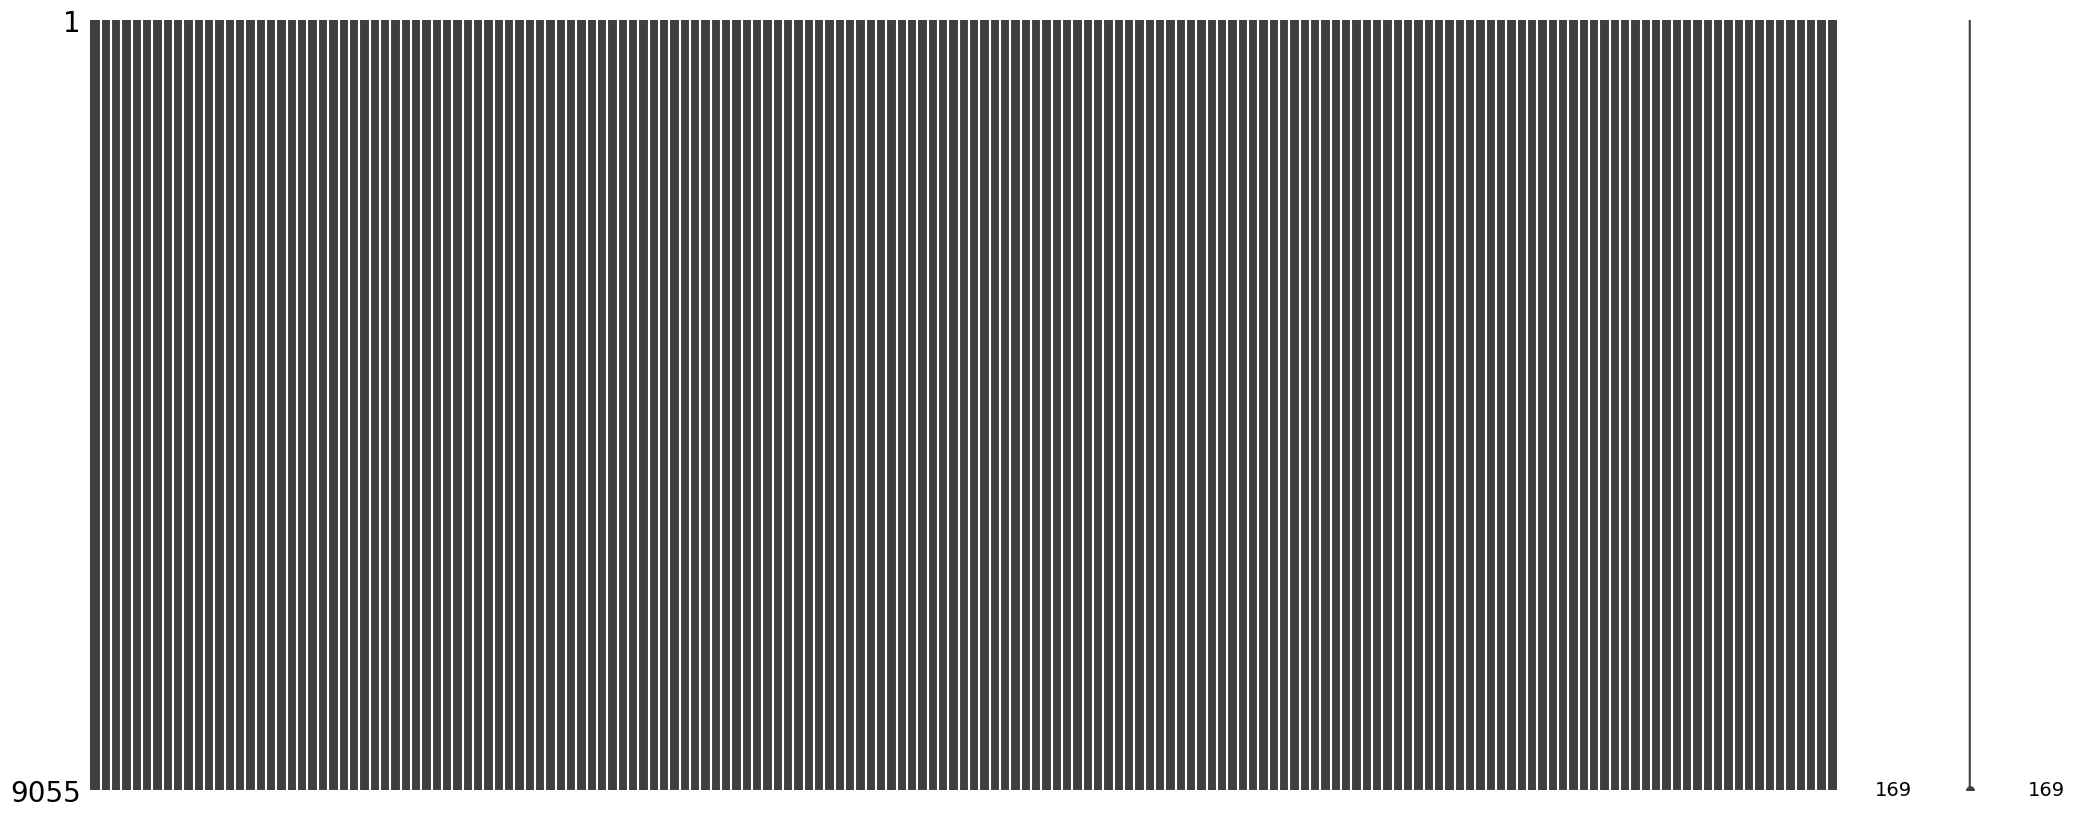

In [26]:
msno.matrix(Data_B_KNN)

In [27]:
Data_B_KNN.to_csv('Data_B_KNN.csv', index=False)
Data_A_KNN.to_csv('Data_A_KNN.csv', index=False)
Data_B_MICE.to_csv('Data_B_MICE.csv', index=False)
Data_A_MICE.to_csv('Data_A_MICE.csv', index=False)
Data.to_csv('NOT Imputed, Cleaned by HT.csv', index=False)